In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

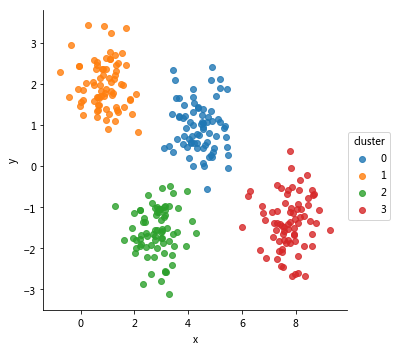

In [2]:
df = pd.read_csv("cdata.csv")
df.head()
sns.lmplot(x="x",y="y",fit_reg=False,hue="cluster",data=df)

In [3]:
#init
D = np.array(df.iloc[:,:-1])
space = np.vstack((D.min(0),D.max(0)))
rang = space[1] - space[0]
def startpoint():
    for i in range(4):
        yield np.random.random((2,))*rang + space[0]
startpts= startpoint()
list(startpts)
# print(next(startpoint()))

[array([6.61792616, 1.19201472]),
 array([8.53983211, 0.51577669]),
 array([ 1.99523762, -1.28601424]),
 array([5.19244339, 0.95295789])]

In [4]:
def distance(a,b):
	return  np.sqrt(sum((a-b)**2)) 
def get_centroid_point(x):
	x = np.array(x)
	return  np.mean(x)

In [16]:
df = pd.read_csv("cdata.csv")
clus = df[["x","y"]]
def kmeans(data,n = 10):
    data["Label"]=None
    #create Initialization of Centroids
    
    #better way
    #startpts= list(startpoint())
    
    #another way
    startpts = df.iloc[:,:-1].values
    np.random.shuffle(startpts)
    startpts = startpts[:n]
    
    labels= list(range(n))
    while True:
        sse = 0
        for i,v in data.iloc[:,:-1].iterrows():
            features = v.values
            #create a dictionay to gey the distance with three centroids dots
            dist = dict()
            for central,lbl in zip(startpts,labels):
                dist[lbl] = distance(features,central)
            #find the label of shortest distance 
            min_distance_lbl = pd.Series(dist).idxmin()
            sse += pd.Series(dist).min()
            data.ix[i,"Label"] = min_distance_lbl
        means = data.groupby("Label").mean().values
        print(sse)
        if np.array_equal(means,startpts):
            return sse
            break
        else: startpts = means
        meanplot =  pd.DataFrame(means,columns=["x","y"]) 
        #ploting
#         ax = data[data["Label"]=="A"].plot.scatter(x="x",y="y",c="r")
#         for i ,c in zip(list("ABCD"),list("rgb")+["orange"]):
#             data2plot = data[data["Label"]==i]
#             data2plot.plot.scatter(x="x",y="y",c=c,ax=ax,label = i)
#         meanplot.plot.scatter(x = "x",y="y",c ="k",ax=ax,s=100,label="Central",marker="x" )
#         ax.legend()
#         plt.show()
#         sns.lmplot(x="x",y="y",fit_reg=False,hue="Label",data=data)
# kmeans(clus,n=10)

c:\python35\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


682.2004816182184
589.6350592782624
590.5357973736675
591.5244204143677
540.4501906001071
361.16404007122736
355.1018462768939
420.6612006398988
341.39396912227005
341.2496329596556
465.98136780876587
316.6159201079558
214.54508302824806
212.63476678245533
211.13365373454093
210.77510375658156
210.75610676622708
210.91872801893945
245.99987456790183
203.94773272241935
202.23048995333704
201.82580191677098
201.41492659788577
201.2237258917059
200.89283083360274
200.8700151070865
200.99726404339253
259.89109991127697
199.5720879872587
196.64870998195326
195.55907745593044
195.56070936360152
195.58291809095383
358.8898670232656
218.19890089186165
193.569845013559
187.22925068887702
185.045052527421
184.57220914079014
184.4814059243793
184.29301958407953
184.2736748143528
196.31623535752965
180.05880801357017
178.30561364850246
177.93263323788005
177.87341568258006
177.8637850891411


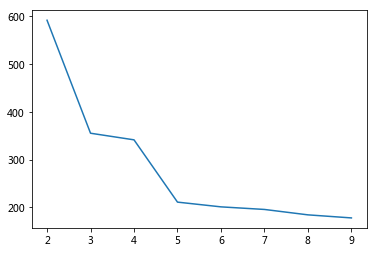

In [6]:
df = pd.read_csv("cdata.csv")
clus = df[["x","y"]]
SSE = []
for n in range(2,10):
    a = kmeans(clus,n=n)
    SSE.append(a)
plt.plot(range(2,10),SSE)
plt.show()

In [7]:
#check the result of clustering
clus["True"] = df["cluster"].values
print(clus.head())
for i in range(4):
    each = clus[clus["True"]==i]
    print(each["Label"].value_counts())

        x       y  Label  True
0  2.1364  0.8369      2     1
1  7.4096 -1.4137      8     3
2  5.0996  1.1552      1     0
3  7.8149 -1.0186      7     3
4  1.8925  1.2714      2     1
1    48
6    26
4     1
Name: Label, dtype: int64
2    75
Name: Label, dtype: int64
0    39
5    29
4     7
Name: Label, dtype: int64
8    33
7    25
3    17
Name: Label, dtype: int64


In [8]:
features = df[["x","y"]].values

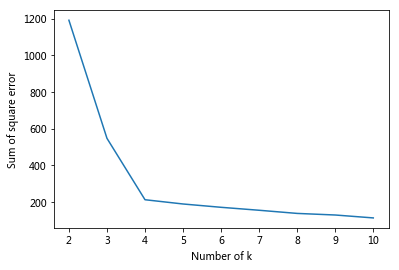

In [9]:
df = pd.read_csv("cdata.csv")
features = df[["x","y"]].values
#elbow method
SSE = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='random')
    kmeans.fit(features)
    SSE.append(kmeans.inertia_)
plt.plot(range(2,11),SSE)
plt.xlabel("Number of k")
plt.ylabel("Sum of square error")
plt.savefig("elbow",dpi=500)

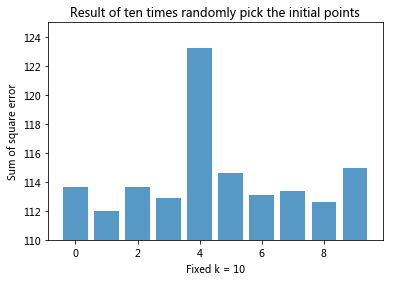

In [10]:
# ten times
SSE = []
for i in range(10):
    kmeans = KMeans(n_clusters=10,init='random')
    kmeans.fit(features)
    SSE.append(kmeans.inertia_)
plt.bar(range(10),SSE,alpha=.75)
plt.xlabel("Fixed k = 10")
plt.ylabel("Sum of square error")
plt.title("Result of ten times randomly pick the initial points")
plt.ylim(110,125)
plt.savefig("ten",dpi=500)

In [17]:
df = pd.read_csv("cdata.csv")
clus = df[["x","y"]]
for i in range(10):
    a = kmeans(clus,n=10)
    print(a)

c:\python35\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


206.64610810625467
175.50565388464886
168.5519915107627
165.56115116566036
165.00671269307668
164.9320248389833
164.98106108556522
164.98106108556522
227.07033772851534
177.7962578230037
174.34852034919172
172.47691363272565
172.06946300486825
170.76167133559406
169.5431698207803
167.741784877717
167.1612869321986
166.94941793406286
166.94941793406286
205.98368457595603
173.76209689283334
170.70964038227163
167.61180131652733
165.21506766600513
164.82333767384264
164.59777232413276
164.57702006577736
164.50824756431766
164.14107747663843
164.0442398024048
164.0442398024048
259.1861697111047
184.51113463377905
181.12069230265675
180.2846230879367
179.12517419896787
177.35754337018437
175.7173527442943
175.24060887603616
174.7026025251355
174.70262200084431
174.69845084169927
174.28477534328437
173.98488185647068
173.85743725358716
173.17026839228197
172.1581119103627
171.35657367567117
171.2099933101319
171.02393153114792
170.7133554690937
169.65025966341292
168.31255405117605
167.01781

KeyboardInterrupt: 